# Decision Trees & Random Forests

* In this notebook, we take a look at the intuition behind ID-3 Algorithm, and how it extends to Random Forests. In any Classification, Regression task, I personally use Decision tree algorithm as a first attempt to understand important features in a given dataset. 
* Before we start coding a decision tree, we need to understand the concept of Entropy, in Information theory. Decision trees are non-parametric (the model makes no assumptions, unlike many other traditional method, and makes most Intuitive sense in visualizing it !)

### Entropy
* The formal definition of entropy is as follows: H(x) is the expected number of bits needed to encode randomly drawn value of X.

$$ H(x) =-\sum _{i}P_{i}\log {P_{i}} $$

* To put simply, entropy conveys the impurity of a set/ vector. We know for a fair coin, probability of heads = 0.5. For 1000 random trials, we would get highest Pmf values at 0.5 (According to law of large numbers), hence, it has the more impurity (equally likely to be heads or tails).

* For a biased coin (say probability of heads = 0.9, the impurity is much lesser, when compared to an unbiased coin), hence, would have lesser entropy.

In [10]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# function to return Entropy
def EntropyCoin(p_heads):
    p_tails = 1 - p_heads
    return  -(p_heads*math.log2(p_heads) + p_tails*math.log2(p_tails))

In [11]:
# Iterating through probability of heads
    
entropy_val = [EntropyCoin(i) for i in np.arange(0.0001,0.9999,0.01)]

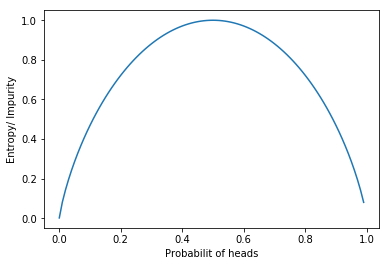

In [12]:
plt.ylabel('Entropy/ Impurity')
plt.xlabel('Probabilit of heads')
plt.plot(np.arange(0.0001,0.9999,0.01), entropy_val)

* Above, we see that Entropy = 1, at p_heads = p_tails = 0.5 (Highest impurity), whereas p_heads = 0 and p_heads = 1, has least impurity.

* For example, let us consider the following dataset, we calculate the specific entropy, conditional entropy and Information gain to decide the best-attribute to help classify if the playground is open today.

In [13]:
# The task is to generate a decision tree to help classify if it is going to rain or not.

df = pd.DataFrame()
df['rainy'] = ['yes','yes','yes','no','no']
df['sunny'] = ['no','no','yes','yes','no']
df['is_open'] = [0, 0, 0, 1, 1]
df

,rainy,sunny,is_open
0,yes,no,0
1,yes,no,0
2,yes,yes,0
3,no,yes,1
4,no,no,1


### How do we decide which attribute is more 'useful' to classify our data ?

#### Specific Conditional Entropy, Conditional Entropy & Information Gain

* Entropy can be conditioned across different categories of an attribute, and specific conditional entropy can be calculated.


* Conditional Entropy is the weighted average of specific conditional entropy various categories by the probability of their occurances. 


* The difference between the Entropy of the base attribute and the conditional entropy is the Information Gain (basically describes if we gain more information by using the next attribute, and we would use an attribute which maximizes Information gain). This concept is sufficient to develop an Industrial level Classifier/ Regressor, along with the ID3-algorithm.


* We can use either the rainy or sunny attribute to classify a new data-point, first lets calculate the Class-Entropy. Of the 5 rows, we have the playground open 3 times, and closed 2 times. Hence, class entropy is 

$$ - [(3/5)*log2(3/5) + (2/5)*log2(2/5)] = 0.97 $$

* Hence, we can say the the data-set is impure (almost = 1), meaning we have almost equal number of data-points in either of the classes. Now, let us decide on which attribute to use for classifying our points; we have two attributes at hand, let us start by calculating the Specific Entropy of each attribute.

<img src="decisiontree/1.png">
<img src="decisiontree/2.png">

* We have the specific conditional probabilities for each of the attributes, and we can now calculate the Conditional probability of each of the attributes. 

$$ H(rainy: yes) = 0, H(rainy: no) = 0 $$

$$ H(sunny: yes) = 1, H(sunny: no) = 0.91 $$

* Conditional Entropy for attribute rainy:

$$ H(rainy)  =  - [ P(rainy: yes)*H(rainy: yes) + P(rainy: no)*H(rainy: no)] $$

$$ H(rainy)  =  - [(3/5)*(0) + (2/5)*(0)] = 0 $$

* Conditional Entropy for attribute sunny:

$$ H(sunny)  =  - [ P(sunny: yes)*H(sunny: yes) + P(sunny: no)*H(sunny: no)] $$

$$ H(sunny)  =  - [(2/5)*(1) + (3/5)*(0.91)] = 0.946 $$

* Now, we can calculate Information Gain for each of the attributes:

$$ InfoGain(rainy) = ClassEntropy - H(rainy) = 0.97 - 0.0 = 0.97 $$

$$ InfoGain(sunny) = ClassEntropy - H(sunny) = 0.97 - 0.946 = 0.024 $$


* Of the two information attributes above, we should use the 'rainy' attribute to split our decision tree first, followed by 'sunny' attribute.

In [14]:
# same dataset, expressed in binary form
df = pd.DataFrame()
df['rainy'] = [1,1,1,0,0]
df['sunny'] = [0,0,1,1,0]
df['is_open'] = [0, 0, 0, 1, 1]

# importing decision tree class from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf = dt_clf.fit(df[['rainy','sunny']], df.is_open)

In [15]:
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

* Below is the final Decision Tree Classifier which includes set of rules to classify the data. The only condition which matters is wether it is rainy or not. If it is not rainy, the playground if open, else the play-ground is closed. Note that there is no influence of the second attribute (sunny), whatsoever. 

* Hence, observe the feature importance of the two attributes. 

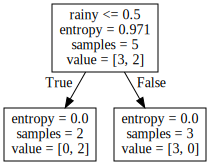

In [16]:
from graphviz import Source
Source(tree.export_graphviz(dt_clf, out_file=None, feature_names=df[['rainy','sunny']].columns))

In [17]:
# we can see the importance of features in our classifier, 
# and attribute sunny has no influence at all.

dt_clf.feature_importances_

array([1., 0.])

* Now, let us explore to classify a larger data-set, and try changing the parameters in our Decision Tree Classifier model. Let us use the famous digits dataset from sklearn library.

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()

digits_X = digits['data']
digits_y = digits['target']

In [24]:
# input feature matrix digits_X has 1797 samples and 64 attributes/ columns

digits_X.shape, digits_y.shape

((1797, 64), (1797,))

<Figure size 432x288 with 0 Axes>

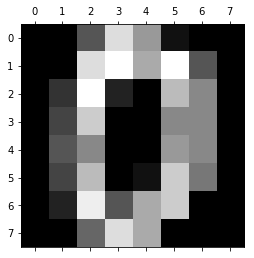

In [32]:
# Below is the first image, with 64 features (8 rows and 8 columns), and represents the digit 0

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [36]:
# converting from array to DataFrame
df = pd.DataFrame(digits_X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [60]:
# Now, we split the dataset into train and test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, digits_y, test_size=0.33, random_state=42)

In [61]:
# classifier
dt_clf_digits = DecisionTreeClassifier(criterion='entropy')

# training dataset
dt_clf_digits.fit(X_train, y_train)

# prediction step
y_pred = dt_clf_digits.predict(X_test)

In [62]:
# We obtain accuracy of 86 %
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8569023569023569


In [64]:
# Confusion matrix: We use confusion matrix to understand the errors for each of the digits individually

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[51,  0,  1,  1,  1,  0,  0,  0,  1,  0],
       [ 0, 51,  1,  0,  0,  0,  0,  0,  1,  2],
       [ 0,  1, 39,  1,  1,  1,  0,  3,  5,  1],
       [ 0,  1,  2, 48,  1,  4,  0,  0,  0,  0],
       [ 3,  2,  0,  0, 51,  0,  1,  5,  1,  1],
       [ 0,  3,  0,  3,  2, 63,  1,  1,  0,  0],
       [ 0,  1,  0,  0,  1,  0, 54,  0,  0,  1],
       [ 0,  1,  1,  2,  2,  1,  0, 52,  0,  3],
       [ 0,  0,  2,  2,  1,  0,  0,  4, 42,  1],
       [ 3,  0,  0,  1,  1,  1,  0,  2,  2, 58]])

* We obtain around 86 % accuracy with default parameters; we can tweak the 'max_depth' parameter, which controls the size of the tree, and can use it to check over-fitting; as Decision trees are prone to overfitting, and try to memorize the data.

In [88]:
# Function to calculate train, test accuracy for differetn max_depth values
def DecisionTreeClf():
    
    X_train, X_test, y_train, y_test = train_test_split(df, digits_y, test_size=0.33, random_state=42)
    train_acc = []
    test_acc = []
    
    for i in range(1,16,2):
        # classifier
        dt_clf_digits = DecisionTreeClassifier(criterion='entropy', max_depth=i)

        # training dataset
        dt_clf_digits.fit(X_train, y_train)

        # prediction step
        y_pred = dt_clf_digits.predict(X_test)
        
        #accuracy
        train_acc.append(accuracy_score(y_train, dt_clf_digits.predict(X_train)))
        test_acc.append(accuracy_score(y_test, y_pred))
        
    return train_acc, test_acc

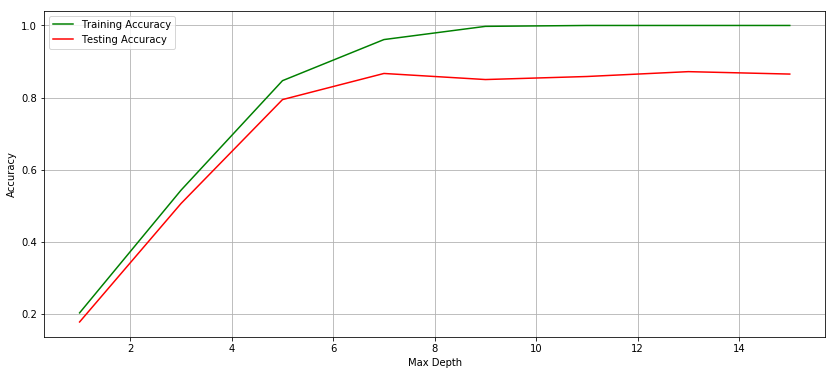

In [95]:
# function call
train_acc, test_acc = DecisionTreeClf()

plt.figure(figsize=(14,6))
plt.plot(np.arange(1,16,2),train_acc,c='g',label='Training Accuracy')
plt.plot(np.arange(1,16,2),test_acc,c='r',label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

* We observe that at max_depth = 9, the training accuracy reaches 100 %, Hence, max_depth < 9 is our best bet to avoid over-fitting.

### Where does Random Forest come from ?
* We know that a Decision tree is prone/ tends to overfit to the data, causing high variance in the model. Hence, we tend to use some Bagging algorithm, which takes average votes to stabilize the model.


* Bagging stands for Bootstrap Aggregation. According to sklearn documentation, the formal definition is as follows: A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. (Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


* When using a Random Forest, we have a lot of hyperparameters to decide on. The number of Decision Tree classifiers to use in our Random Forest, the number of features to use to decide the best split, the number of samples to choose, and if we need to use replacement method to do so.

In [100]:
from sklearn.ensemble import RandomForestClassifier

def RandomForestClf():

    X_train, X_test, y_train, y_test = train_test_split(df, digits_y, test_size=0.33, random_state=42)
    train_acc = []
    test_acc = []
    
    for i in range(1,100,2):
        # classifier
        dt_clf_digits = RandomForestClassifier(criterion='entropy', n_estimators=i)

        # training dataset
        dt_clf_digits.fit(X_train, y_train)

        # prediction step
        y_pred = dt_clf_digits.predict(X_test)
        
        #accuracy
        train_acc.append(accuracy_score(y_train, dt_clf_digits.predict(X_train)))
        test_acc.append(accuracy_score(y_test, y_pred))
        
    return train_acc, test_acc

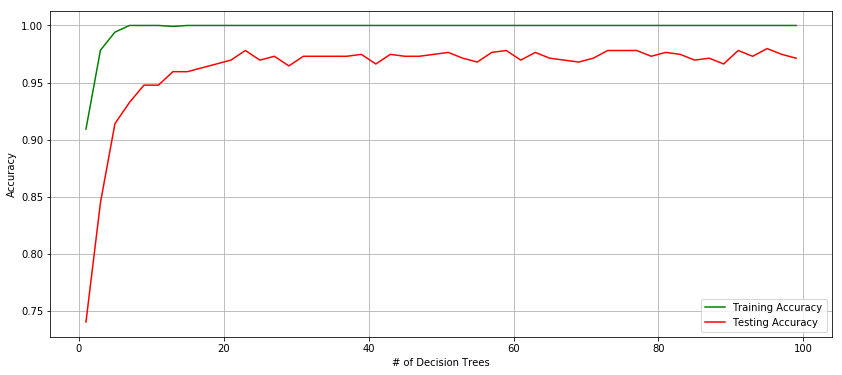

In [101]:
# function call
train_acc, test_acc = RandomForestClf()

plt.figure(figsize=(14,6))
plt.plot(np.arange(1,100,2),train_acc,c='g',label='Training Accuracy')
plt.plot(np.arange(1,100,2),test_acc,c='r',label='Testing Accuracy')
plt.xlabel('# of Decision Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

* We observe that the accuracy obtained by using Random Forest Classifier is consistently over 95 %, when compared to best accuracy of 85 % from Decision Tree classifier. The Random Forest classifier is much complex and computationally expensive when compared to a single Decision Tree.